# **Statistical analysis**

### Objectives
- Do a statistical analysis on as many variables as possible to check whether there is any relationship between `class` and the variable.

### Input
- The cleaned and preprocessed dataset.

### Output
- Distribution graphs and statistical tests summarized in the table at the end

## Load the data
Here we will import the relevant libraries

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

And load the data

In [2]:
df = pd.read_csv("../data/clean/network-intrusions-clean.csv")
print(df.shape)
df.head()

(25192, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,service_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,File_Transfer
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Other
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,Other
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Web
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Web


## 1. Continuous (float64) variable distribution and statistical tests
We will do the following two things:
- plot a histogram 
 From our data cleaning we know that none of them are normally distributed therefore

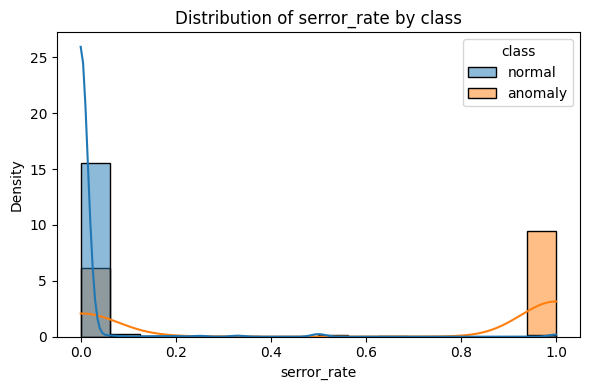

U statistic: 30637087.5
p-value: 0.0
significant




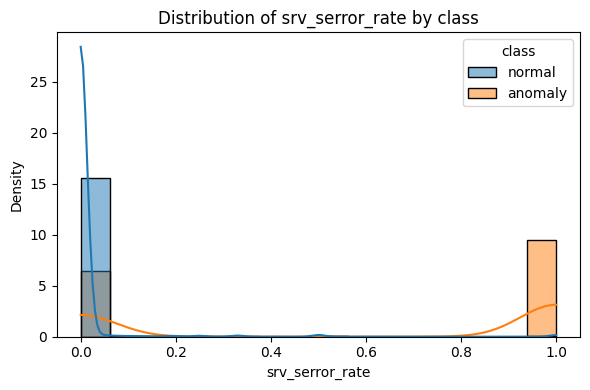

U statistic: 33273691.5
p-value: 0.0
significant




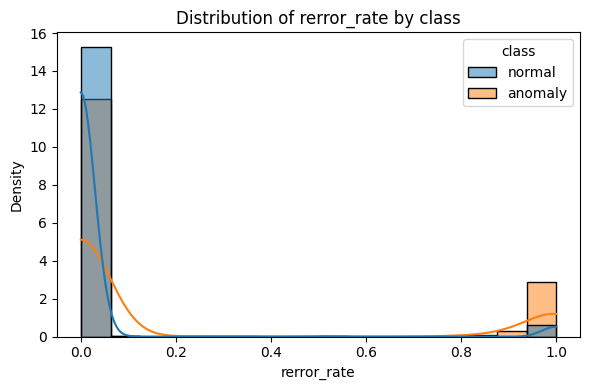

U statistic: 65241081.0
p-value: 0.0
significant




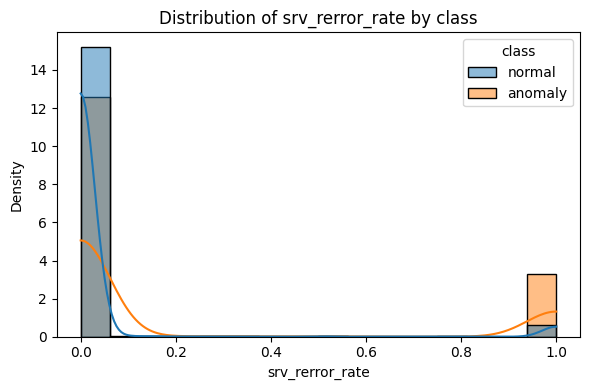

U statistic: 65921543.0
p-value: 0.0
significant




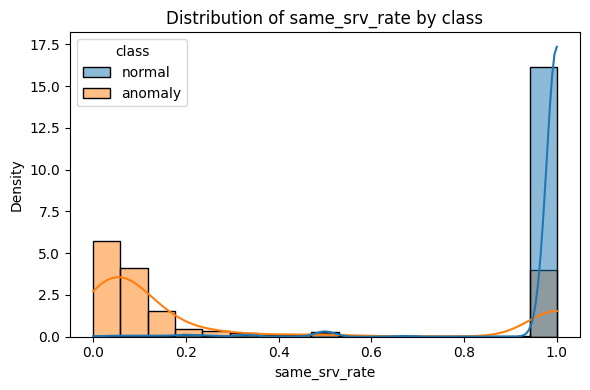

U statistic: 137776682.0
p-value: 0.0
significant




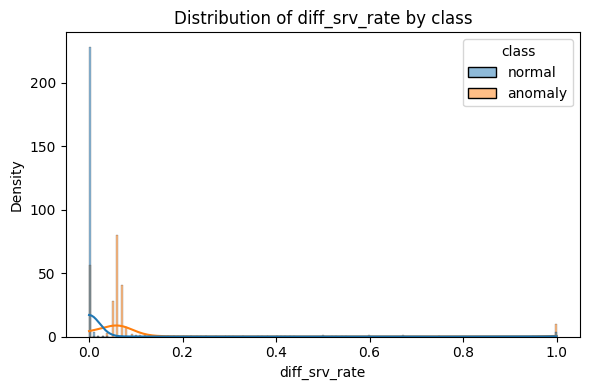

U statistic: 24941812.0
p-value: 0.0
significant




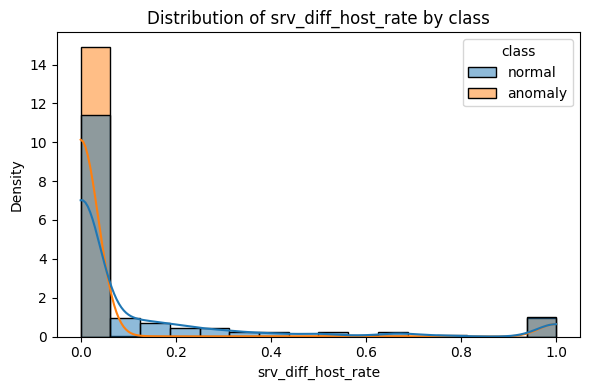

U statistic: 100738410.0
p-value: 0.0
significant




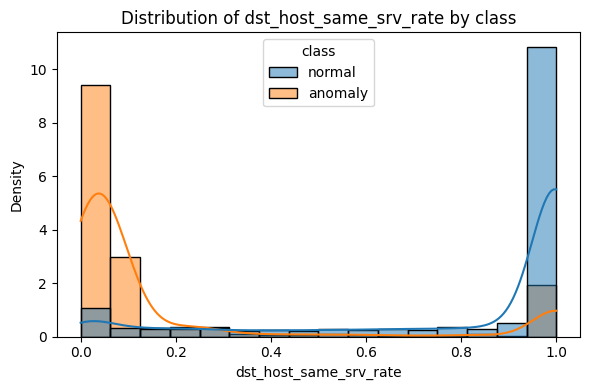

U statistic: 136486749.5
p-value: 0.0
significant




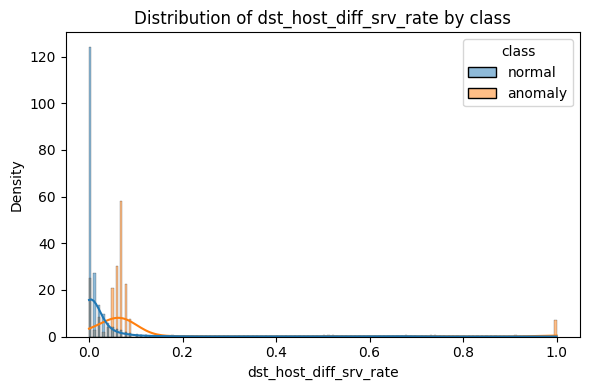

U statistic: 27664130.5
p-value: 0.0
significant




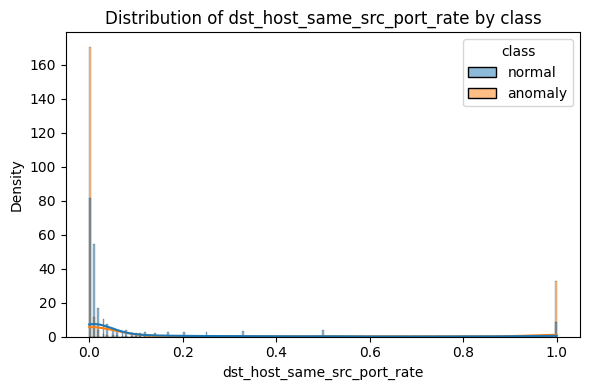

U statistic: 99557868.0
p-value: 0.0
significant




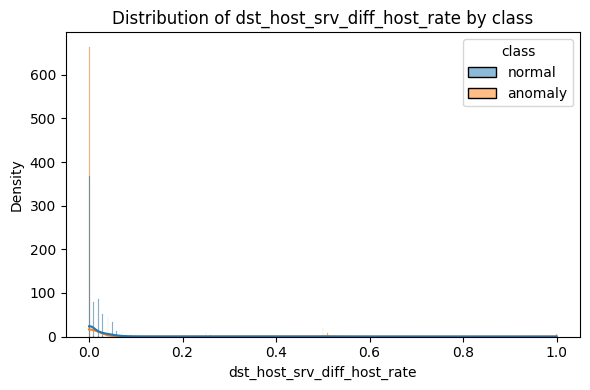

U statistic: 107574503.0
p-value: 0.0
significant




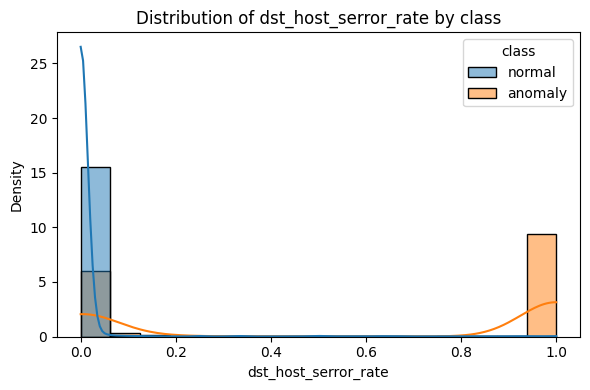

U statistic: 29819649.5
p-value: 0.0
significant




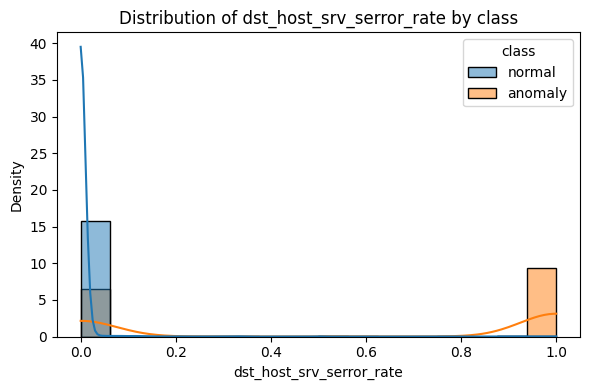

U statistic: 34130110.5
p-value: 0.0
significant




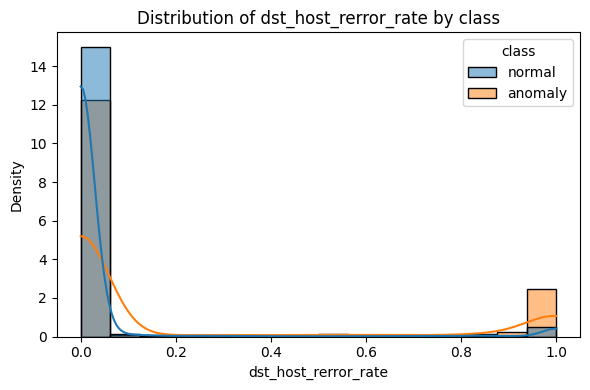

U statistic: 65736968.5
p-value: 1.4801127639459754e-259
significant




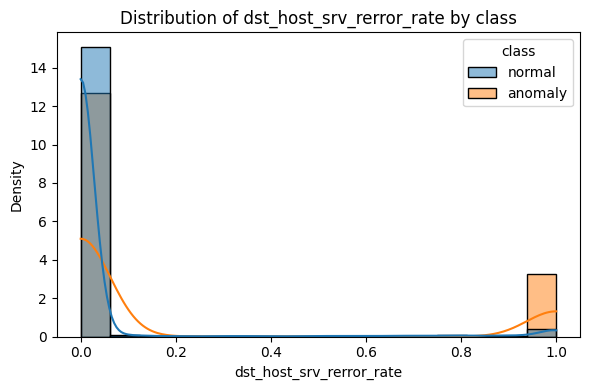

U statistic: 67394605.0
p-value: 5.025959532654295e-227
significant




,variable,test,statistic,p_value,significant
0,serror_rate,Mann–Whitney U,30637087.5,0.000000e+00,True
1,srv_serror_rate,Mann–Whitney U,33273691.5,0.000000e+00,True
2,rerror_rate,Mann–Whitney U,65241081.0,0.000000e+00,True
3,srv_rerror_rate,Mann–Whitney U,65921543.0,0.000000e+00,True
4,same_srv_rate,Mann–Whitney U,137776682.0,0.000000e+00,True
5,diff_srv_rate,Mann–Whitney U,24941812.0,0.000000e+00,True
6,srv_diff_host_rate,Mann–Whitney U,100738410.0,0.000000e+00,True
7,dst_host_same_srv_rate,Mann–Whitney U,136486749.5,0.000000e+00,True
8,dst_host_diff_srv_rate,Mann–Whitney U,27664130.5,0.000000e+00,True
9,dst_host_same_src_port_rate,Mann–Whitney U,99557868.0,0.000000e+00,True


In [10]:
float_cols = df.select_dtypes(include='float64')

stat_summary_float = pd.DataFrame(columns=['variable', 'test', 'statistic', 'p_value', 'significant'])

for col in float_cols:
    # Plot histogram with KDEs
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='class', kde=True, stat='density', common_norm=False)
    plt.title(f'Distribution of {col} by class')
    plt.tight_layout()
    plt.show()
    
    # Split into two groups
    group_normal = df[df['class'] == 'normal'][col].dropna()
    group_anomaly = df[df['class'] == 'anomaly'][col].dropna()
    
    # Mann–Whitney U test
    U, p = stats.mannwhitneyu(group_normal, group_anomaly, alternative='two-sided')
    print(f"U statistic: {U}")
    print(f"p-value: {p}")
    if p < 0.05:
        print("significant")
    else:
        print("Not significant")
    print('\n')

    # Record results
    stat_summary = pd.concat([
        stat_summary,
        pd.DataFrame({
            'variable': [col],
            'test': 'Mann–Whitney U',
            'statistic': [U],
            'p_value': [p],
            'significant': [p < 0.05]
        })
    ], ignore_index=True)

stat_summary

As you can see all of these results are significant and have astronomically small p values, in fact they are so small in most cases that they cannot fit in the float data type and gets rounded to 0.